In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import DotDict
import yaml

# Load the map definition from file
filepath = '../../../moro_simulator' + '/world/maze_map.yaml'
with open(filepath) as f:
    msg = DotDict(yaml.safe_load(f))

<IPython.core.display.Javascript object>


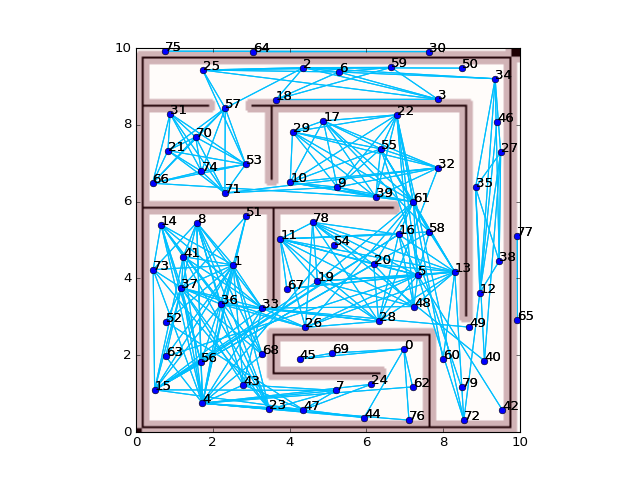

In [3]:
%matplotlib notebook

from probabilistic_roadmap import ProbabilisticRoadmap
import matplotlib.pyplot as plt

import numpy as np

# Set random seed to compare different parameters
np.random.seed(45)

prm = ProbabilisticRoadmap(msg)
prm.plot()

for node, coord in enumerate(prm.nodes):
    plt.text(coord[0], coord[1], str(node))

plt.show()

In [4]:
#from moro_navigation.shortest_path import dynamic_programming
from shortest_path import dynamic_programming

In [5]:
path = dynamic_programming(prm.graph, 3, 51)
path

array([ 3,  2, 57, 71,  9, 61, 26, 33,  1, 51])

<IPython.core.display.Javascript object>


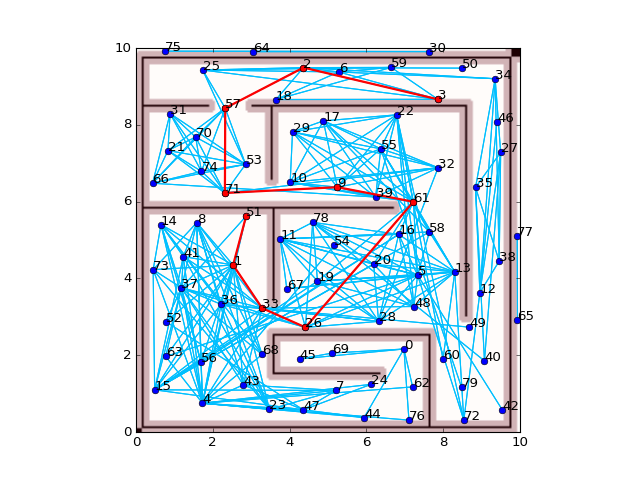

In [6]:
plt.figure()
prm.plot(path)
plt.show()

In [7]:
#from moro_navigation.shortest_path import dijkstra, astar
from shortest_path import dijkstra, astar

In [8]:
path1 = dijkstra(prm.graph, 3, 51)
path1

[3, 2, 57, 71, 9, 61, 26, 33, 1, 51]

In [9]:
#from moro_navigation.utils import distance

#heuristic = distance(prm.nodes, prm.nodes[3])
heuristic = lambda node1, node2 : np.linalg.norm(prm.nodes[node2]-prm.nodes[node1])
path2 = astar(prm.graph, 3, 51, heuristic)
path2

[3, 2, 57, 71, 9, 61, 26, 33, 1, 51]

<IPython.core.display.Javascript object>


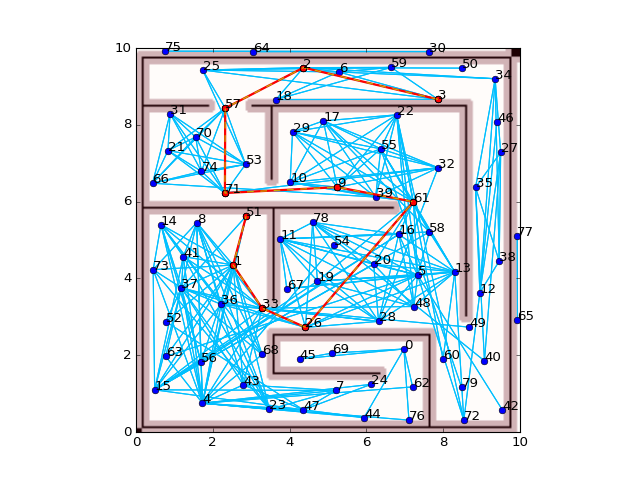

In [10]:
plt.figure()
prm.plot(path1)
plt.plot(prm.nodes[path2, 0], prm.nodes[path2, 1], '--yo', markerfacecolor='none')
plt.show()

In [ ]:
start = [46, 35]
while 46 in start or 35 in start:
    start = np.random.choice(range(prm.nodes.shape[0]), 10, replace=False)
goal = 19
start

In [ ]:
%%timeit -n 100
[dynamic_programming(prm.graph, s, goal) for s in start]

In [ ]:
%timeit -r 1 -n 1 dynamic_programming(prm.graph, 1, 4)

In [ ]:
%%timeit -n 100
[dijkstra(prm.graph, s, goal) for s in start]

In [ ]:
%%timeit -n 100 heuristic = distance(prm.nodes, prm.nodes[goal])
[astar(prm.graph, s, goal, heuristic) for s in start]

In [12]:
#from moro_navigation.multiagent_planning import time_expand
from multiagent_planning import time_expand

In [31]:
path1 = dijkstra(prm.graph, 62, 2) #10 3 # 3 51

expanded_graph, expanded_nodes = time_expand(prm.graph, prm.nodes, path1)

path2 = dijkstra(expanded_graph, 2, (len(path1)-1)*prm.graph.shape[0]+10)

<IPython.core.display.Javascript object>


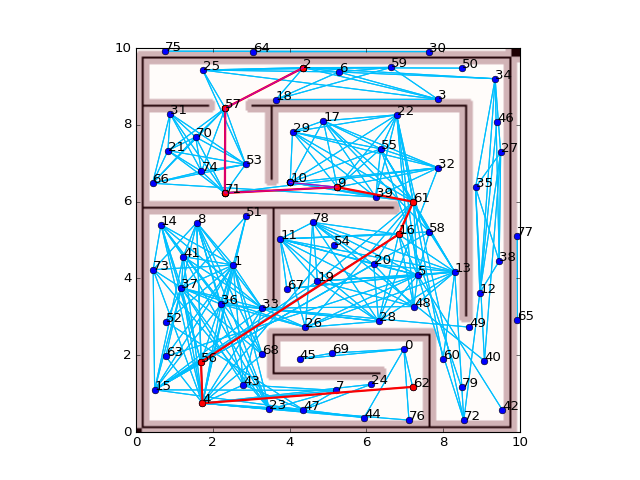

In [32]:
plt.figure()
prm.plot(path1)
plt.plot(expanded_nodes[path2, 0], expanded_nodes[path2, 1], '-mo', markerfacecolor='none') # --yo
plt.show()

<IPython.core.display.Javascript object>


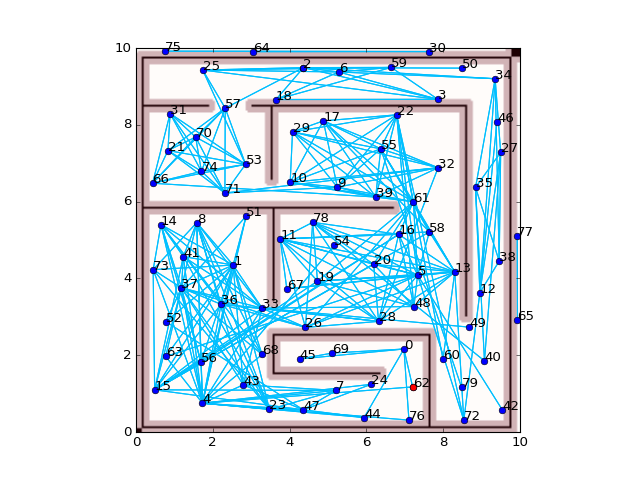

In [33]:
from matplotlib import animation

fig = plt.figure()
prm.plot()
l1, = plt.plot([], [], '-ro')
l2, = plt.plot([], [], '-mo', markerfacecolor='none')

def set_data(line, nodes, path, i):
    ii = i if i < len(path) else -1
    xdata = np.hstack((line.get_xdata(), nodes[path[ii], 0]))
    ydata = np.hstack((line.get_ydata(), nodes[path[ii], 1]))
    line.set_data(xdata, ydata)
    
def animate(i):
    set_data(l1, prm.nodes, path1, i)
    set_data(l2, expanded_nodes, path2, i)
    return l1, l2

def init():
    l1.set_data([], [])
    l2.set_data([], [])
    return l1, l2

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=max(len(path1), len(path2)),
                               interval=1000, blit=True)